In [3]:
library(tidyverse)
library(datasets)
library(stringr)
library(ggplot2)
library(scales)
library(sf)
library(geojsonio)


Attaching package: ‘geojsonio’

The following object is masked from ‘package:base’:

    pretty



In [4]:
vancouver <- sf::st_read('../data/our_geojson_modified.geojson')

Reading layer `our_geojson_modified' from data source `/home/franklu/MDS/DSCI-532-Group108-R/data/our_geojson_modified.geojson' using driver `GeoJSON'
Simple feature collection with 22 features and 1 field
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: -123.2248 ymin: 49.19972 xmax: -123.0233 ymax: 49.29533
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


In [17]:
crime <- read_csv("../data/crimedata_csv_all_years_modified.csv")
crime$HUNDRED_BLOCK <- NULL
crime$X <- NULL
crime$Y <- NULL
total_crime <- crime %>%
    group_by(NEIGHBOURHOOD) %>%
    summarise(total_crime = length(DAY))

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  TYPE = col_character(),
  YEAR = col_double(),
  MONTH = col_double(),
  DAY = col_double(),
  HOUR = col_double(),
  MINUTE = col_double(),
  HUNDRED_BLOCK = col_character(),
  NEIGHBOURHOOD = col_character(),
  X = col_double(),
  Y = col_double(),
  DATE = col_datetime(format = ""),
  DAY_OF_WEEK_NAME = col_character(),
  DAY_OF_WEEK = col_double()
)


In [22]:
full_dt <- full_join(vancouver, total_crime, by = c('NEIGHBOURHOOD', 'NEIGHBOURHOOD'))

Warning message:
“Column `NEIGHBOURHOOD` joining factor and character vector, coercing into character vector”

Saving 6.67 x 6.67 in image


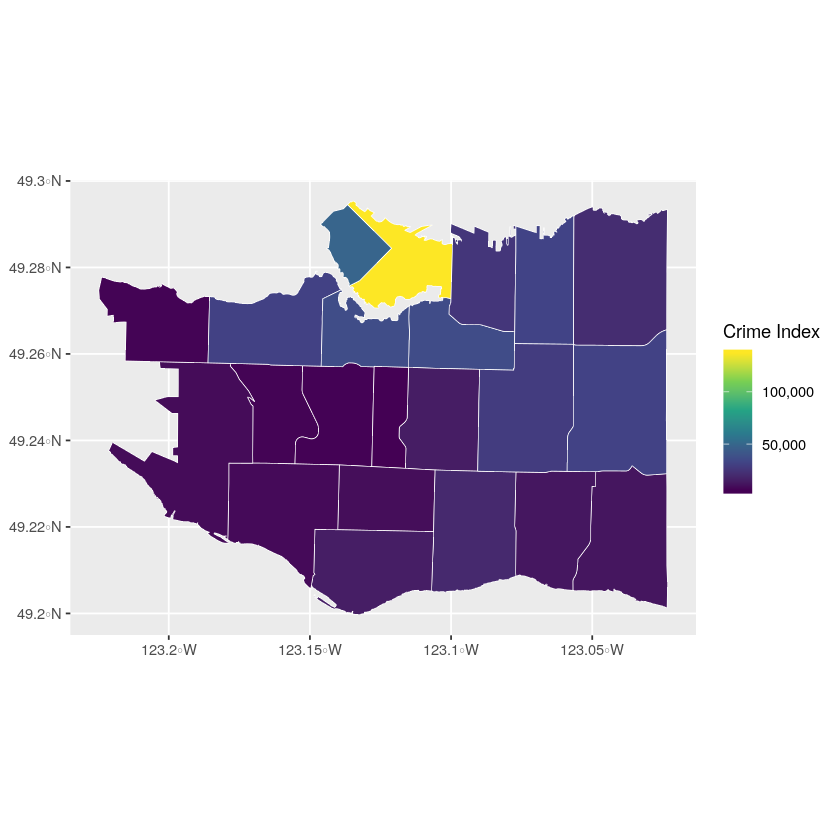

In [29]:
full_dt %>%
    ggplot(mapping = aes(fill = .data[['total_crime']])) +
    geom_sf(color = 'white', size = 0.2) +
    scale_fill_viridis_c(option = 'viridis', 
                         name = "Crime Index", 
                         labels = comma) +
    ggsave('../img/choropleth_total_crime.png')